### Importing libraries

In [1]:
# importing data mainpulation libraries
import pandas as pd
import numpy as np


#importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing model bulding libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint, zscore


- These libraries will be used all through this project to do data analysis, visualization, feature engineering and model building

In [2]:
#importing the dataset
data = '/content/drive/MyDrive/PORTFOLIO PROJECTS/Linear regression/used phone price prediction/data.csv'
data = pd.read_csv(data)
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


- This dataset appears to contain information about different mobile phones, including their brand name, operating system, screen size, whether they support 4G or 5G, camera specifications, internal memory, RAM, battery capacity, weight, release year, days used, and normalized prices for used and new conditions.

---

### Data sanity checks

In [3]:
#making a copy of the dataset
df = data.copy()
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


- The copy has been created for us to wiork on the copy. If there are changes to be made, they will be made on the copy and leave the original dataset unchanged.

In [4]:
#getting the shape of the data
df.shape

(3454, 15)

- The dataset contains 3454 rows and 15 columns

In [5]:
#checking missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- The dataset contains missing values in some of its columns. The main_camera_mp has 179 missing values. This is the coulumn with the highest number of missing values.

In [6]:
#checking for duplicates
df.duplicated().sum()

0

- The data has no duplicates

In [7]:
#checking the data types of the columns
dtypes = df.dtypes
print('dtypes: \n', dtypes)

dtypes: 
 brand_name                object
os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object


- The dataset has object, float and int datatypes

In [8]:
#getting the statistical summary of the numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


- This shows various statistical measures of the data. some of the measures include:


> - Count: Indicates the number of non-null (non-missing) entries for each feature. For example, there are 3454 non-null entries for screen_size.
> - Mean: Represents the average value of the feature. For instance, the average screen_size is approximately 13.71.
> - Std (Standard Deviation): Measures the amount of variation or dispersion of a set of values. A higher standard deviation indicates greater variability. For instance, the screen_size has a standard deviation of approximately 3.81.
> - Min: Shows the minimum value in the dataset for each feature. For example, the minimum screen_size is 5.08.
> - 25%, 50%, 75% (Percentiles): These values represent the 25th, 50th (median), and 75th percentiles of the data. The 25th percentile (Q1) indicates the value below which 25% of the data falls; similarly for the 50th and 75th percentiles. For example, the 50th percentile (50%) of screen_size is 12.83.
> - Max: Represents the maximum value in the dataset for each feature. For instance, the maximum screen_size is 30.71.




In [9]:
#getting the statistical summary of the object columns
df.describe(include = 'object').T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


- This shows the statistical summary of the columns with the object datatypes. It shows some of the following results:
> - Count: Indicates the number of non-null entries for each categorical feature. For example, there are 3454 non-null entries for brand_name
> - Unique: Represents the number of distinct values in each categorical feature. For instance, there are 34 unique values for brand_name.
> - Top: Shows the most frequently occurring value in each categorical feature. For example, "Others" is the most frequent brand in the brand_name column, occurring 502 times.
> - Freq (Frequency): Represents the frequency of the top value. For instance, the top brand "Others" appears 502 times in the brand_name column.

---

**Breaking the summary using the columns**

brand_name:

> - Count: 3454
> - Unique: 34
> - Top: Others
> - Freq: 502

 This indicates that there are 34 unique brands in the dataset, with "Others" being the most common brand occurring 502 times.

os:

> - Count: 3454
> - Unique: 4
> - Top: Android
> - Freq: 3214

There are 4 unique operating systems, with "Android" being the most common one, appearing 3214 times.

4g:

> - Count: 3454
> - Unique: 2
> - Top: yes
> - Freq: 2335

There are 2 unique values for 4G connectivity, and "yes" is the most frequent value, occurring 2335 times.

5g:

> - Count: 3454
> - Unique: 2
> - Top: no
> - Freq: 3302

There are 2 unique values for 5G connectivity, and "no" is the most frequent value, appearing 3302 times.

___

### Univariet analysis

In [10]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


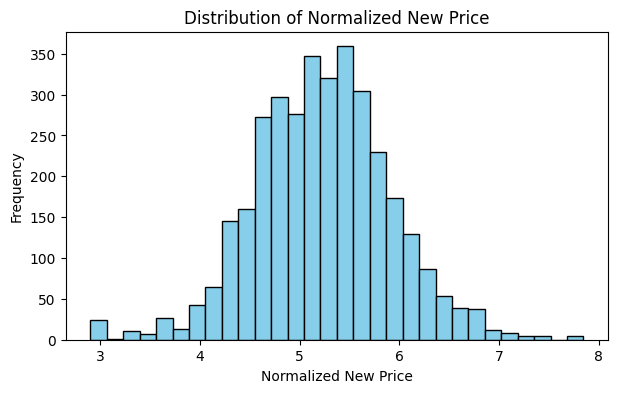

In [11]:
#checking the distribution of the target variable
# Plot the distribution of the 'normalized_new_price'
plt.figure(figsize=(7, 4))
plt.hist(df['normalized_used_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Normalized ued Price')
plt.xlabel('Normalized New Price')
plt.ylabel('Frequency')
plt.show()

- This plot above provides an overview of the range and frequency of new phone prices in the dataset. It appears that most of the phones have a normalized new price around 5.5.

In [12]:
def histogram_boxplot(data, feature, figsize=(7, 4), kde=False, bins=None, edgecolor = 'black'):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


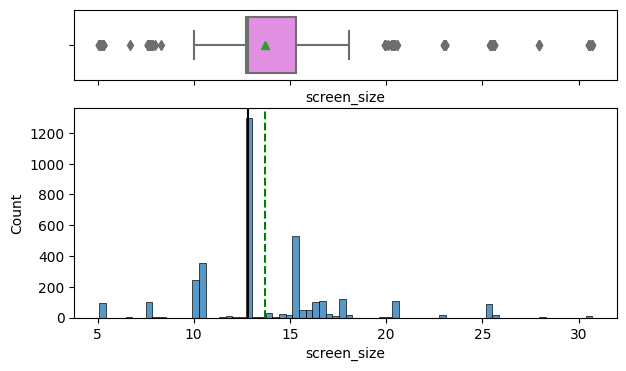

In [13]:
#using the function above to plot histograms
histogram_boxplot(df, 'screen_size')

- It appears that the screensize column has outliers. The column is not normally distributed.
- Most phones have a screen size of around 12 inches

In [14]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

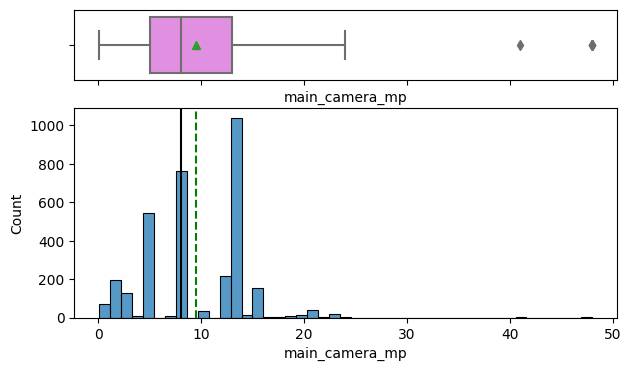

In [15]:
#histogram of main_camera_mp
histogram_boxplot(df, 'main_camera_mp')

 The above plot shows the frequency and distribution of the main camera mega pixels on the phones. It appears that most main cameras in the phones have mega pixels that are approximately 13 MP.

 The plot also shows that the data is not normally distributed. It is right skewed.This means that there is a concentration of phones with lower megapixel counts, and fewer phones with higher megapixel counts are pulling the distribution towards the right.



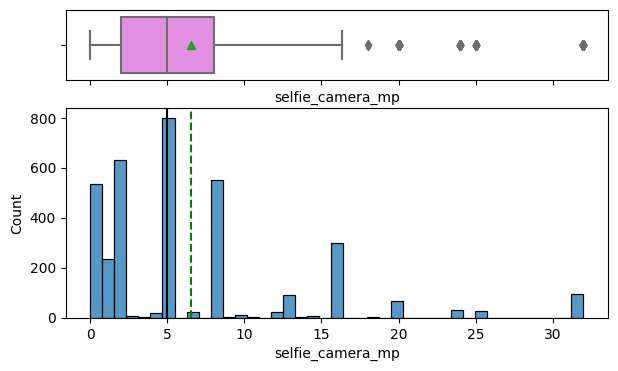

In [16]:
#histogram and box plot of selfie camera mp
histogram_boxplot(df, 'selfie_camera_mp')

The plot above shows the frequency and distribution of the mega pixels found in the selfie camera. Most phones have mega pixels that range from 0 to 10.

The data is right skewed so this suggests that while most phones have lower megapixel counts, there are a few phones with higher megapixel counts that extend the distribution to the right.

The plot shows that there are outliers present. This shows that some phones with exceptionally high megapixel counts compared to the majority are also present.

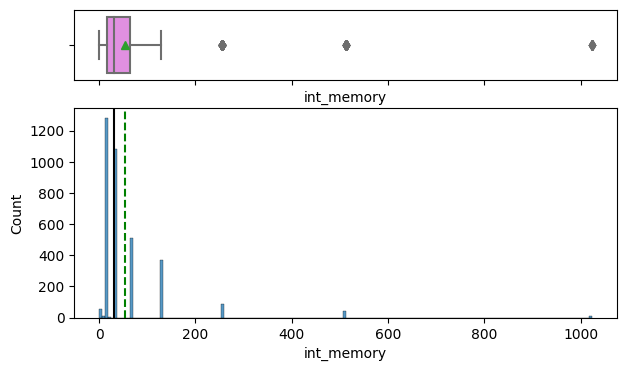

In [17]:
#Histogram and boxplot of internal memory
histogram_boxplot(df, 'int_memory')

The plot above shows the frequecy and distribution of the internal memory of the phones. Most phones have internal memory that range from approximately 0 to 200GB.
This accounts for the right skewness of the data.

The plot also shows that the data also has outliers.This shows that some phones with exceptionally high ram compared to the majority are also present.

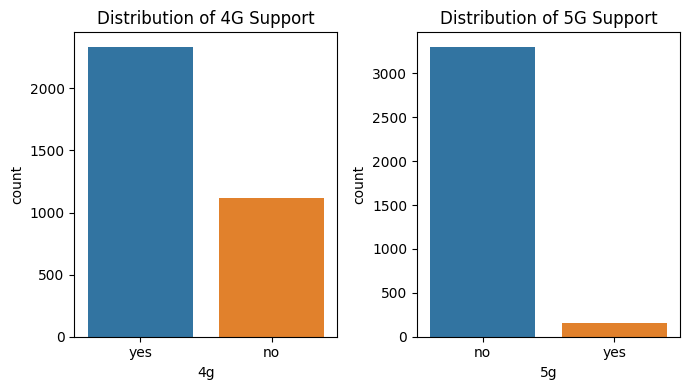

In [18]:
#plotting the distributions of 4g and 5g phones
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

# Plot the distribution of 4G support
sns.countplot(x='4g', data=df, ax=ax[0])
ax[0].set_title('Distribution of 4G Support')

# Plot the distribution of 5G support
sns.countplot(x='5g', data=df, ax=ax[1])
ax[1].set_title('Distribution of 5G Support')

plt.tight_layout()
plt.show()

These plots provide an overview of the proportion of phones that support 4G and 5G. It appears that a majority of phones in our dataset support 4G, while a smaller proportion support 5G. This is likely due to 5G being a newer technology.

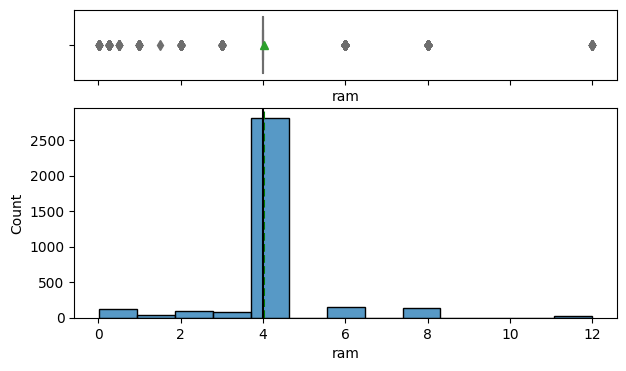

In [19]:
#histogram and boxplot of ram
histogram_boxplot(df, 'ram')

The plot above shows the ram distributions across the mobile phones. Most of the phones have a ram of 4GB. Very few phones have their ram between 0 to 2 and 8 to 12.

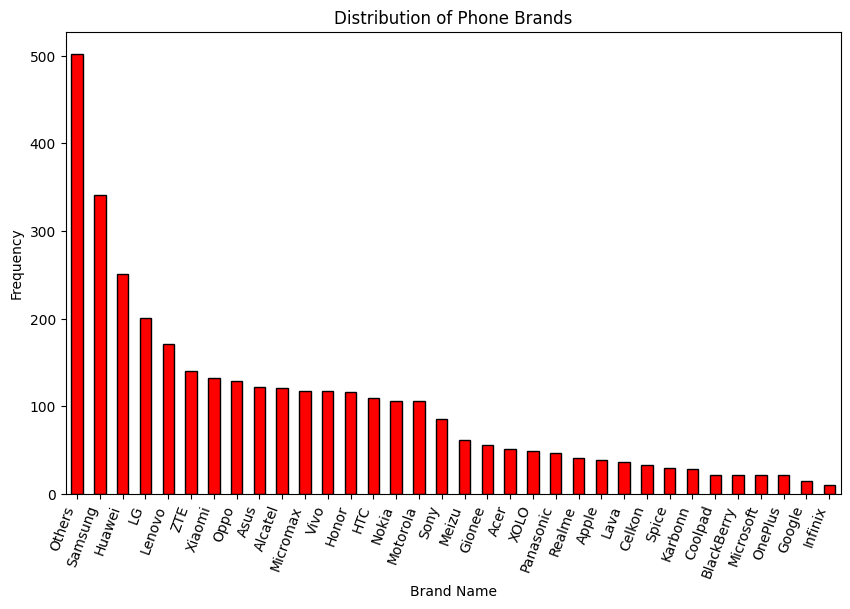

In [20]:
#distribution of brands of the phones
plt.figure(figsize=(10, 6))
data['brand_name'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of Phone Brands')
plt.xticks(rotation = 70, ha = 'right')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')
plt.show()

This plot provides an overview of the frequency of each phone brand in our dataset. It appears that some brands are more common than others.

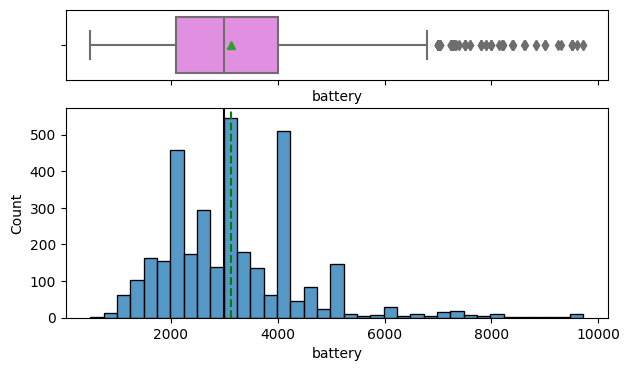

In [21]:
#histogram and boxplot showing battery
histogram_boxplot(df, 'battery')

The plot above shows the distribution and frequency of the battery. Most phones have their batteries range between 2000 and 4500.

The plot is also right skewed and has outliers. This ndicates that while most phones have batteries within a certain range, there are some phones with higher battery capacities that extend the distribution pulling the tail to the right.

---

### Bivariet analysis

In [22]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


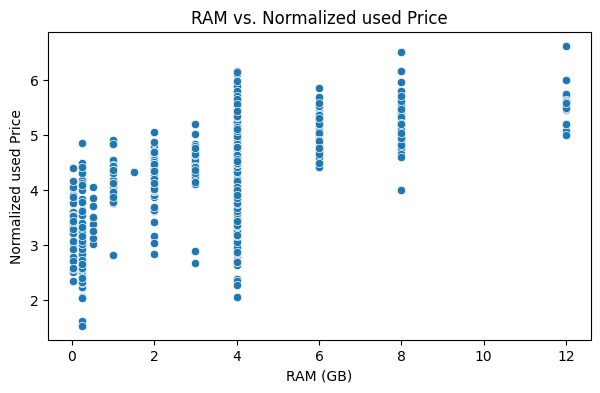

In [23]:
# Create a scatter plot of RAM vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='ram', y='normalized_used_price', data=df)
plt.title('RAM vs. Normalized used Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Normalized used Price')
plt.show()

This visualization provides an overview of how the amount of RAM in a phone affects its price. It appears that phones with more RAM tend to have a higher normalized new price, suggesting that RAM is a significant factor in the pricing of phones.

There are also some phones with a ram of 4 that have higher prices compared to other phones with a higher ram. This might show that other features of the phone also contribute to the price of the phone

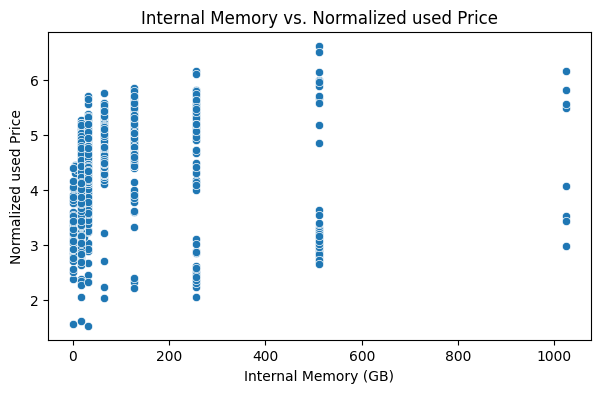

In [24]:
# Create a scatter plot of int_memory vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='int_memory', y='normalized_used_price', data=df)
plt.title('Internal Memory vs. Normalized used Price')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Normalized used Price')
plt.show()

This visualization provides an overview of how the amount of internal memory in a phone affects its price. It appears that phones with more internal memory tend to have a higher normalized new price, suggesting that internal memory is also a significant factor in the pricing of phones

The most expensive phones have an internal memory of approximately 500. This is interesting given that there are phones with an internal memory of 1000.

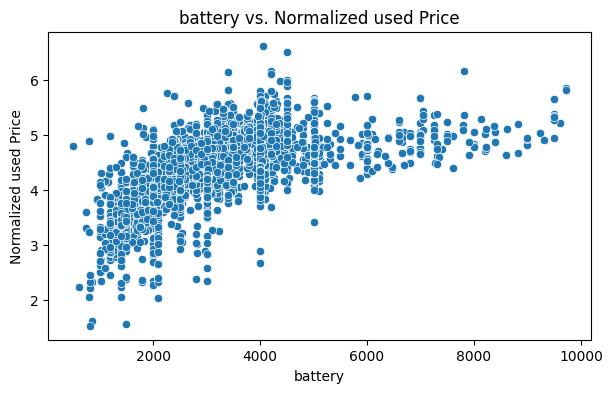

In [25]:
# Create a scatter plot of battery vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='battery', y='normalized_used_price', data=df)
plt.title('battery vs. Normalized used Price')
plt.xlabel('battery')
plt.ylabel('Normalized used Price')
plt.show()

From the plot above, it appears that phones with a larger battery tend to have a higher normalized new price, suggesting that the battery could be a factor in the pricing of phones.
The trend is not a strong trend compared to the other trends seen from previous plots.

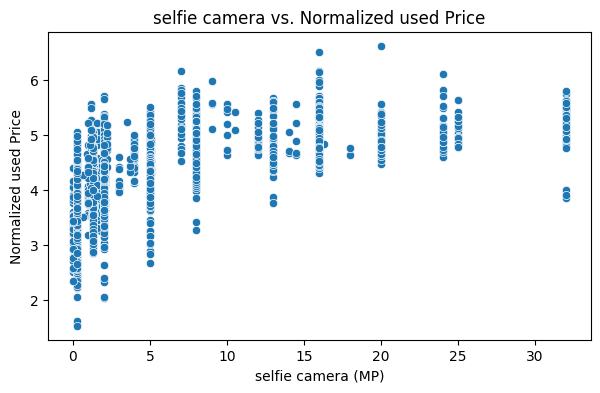

In [26]:
# Create a scatter plot of selfie_camera_mp vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='selfie_camera_mp', y='normalized_used_price', data=df)
plt.title('selfie camera vs. Normalized used Price')
plt.xlabel('selfie camera (MP)')
plt.ylabel('Normalized used Price')
plt.show()

From the plot above it appears that phones with higher selfie camera mp have higher prices compared to other phones.

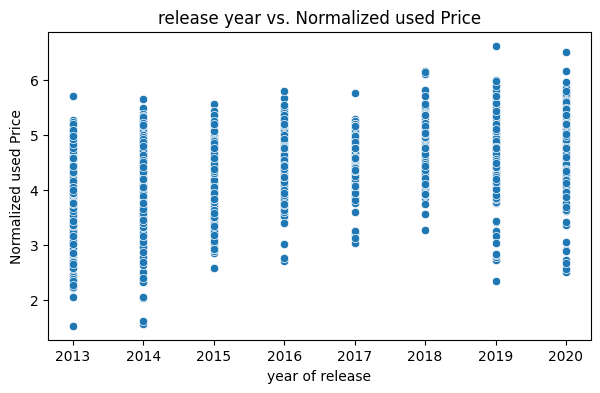

In [27]:
# Create a scatter plot of release year vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='release_year', y='normalized_used_price', data=df)
plt.title('release year vs. Normalized used Price')
plt.xlabel('year of release')
plt.ylabel('Normalized used Price')
plt.show()

The plot above shows the relationship between the year the phone was released and its price. It shows that phones released in the recent years have higher prices. The trend is a weak trend compared to other trends seen

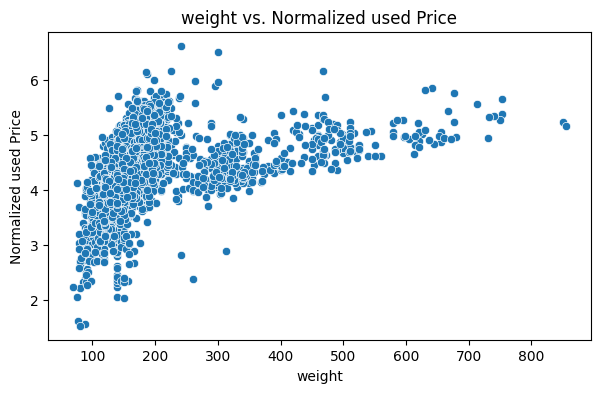

In [28]:
# Create a scatter plot of weight vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='weight', y='normalized_used_price', data=df)
plt.title('weight vs. Normalized used Price')
plt.xlabel('weight')
plt.ylabel('Normalized used Price')
plt.show()

The scatter plot above shows the relationship between the weight of the phone and the prices. It appears that phones that weigh more have higher prices.
It also appears that most phones have a range of weight between 100 to 300

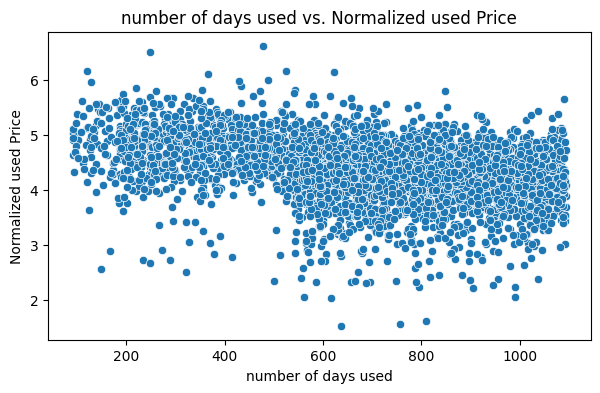

In [29]:
# Create a scatter plot of days used vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='days_used', y='normalized_used_price', data=df)
plt.title('number of days used vs. Normalized used Price')
plt.xlabel('number of days used')
plt.ylabel('Normalized used Price')
plt.show()

The scatter plot above clearly shows that there is no relationship of the days the phone has been used and its price.

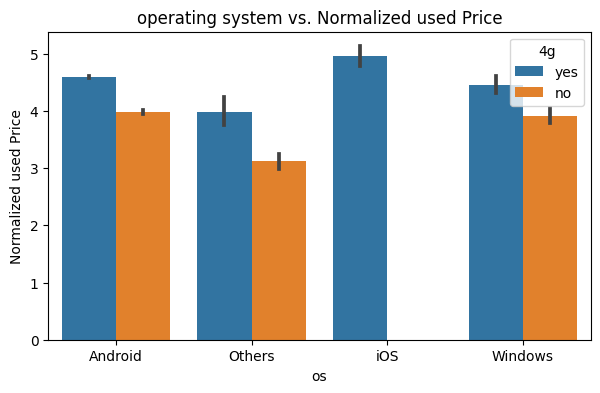

In [30]:
# Create a scatter plot of days used vs. normalized used price
plt.figure(figsize=(7, 4))
sns.barplot(x='os', y='normalized_used_price',hue= '4g', data=df)
plt.title('operating system vs. Normalized used Price')
plt.xlabel('os')
plt.ylabel('Normalized used Price')
plt.show()

The plot above shows the relationship between the os of the phone and the prices. Phones with an IOS operating system have the highest prices. Phones with IOS os only have 4g technology in them

It also shows that android phones with 4g technology have higher prices.

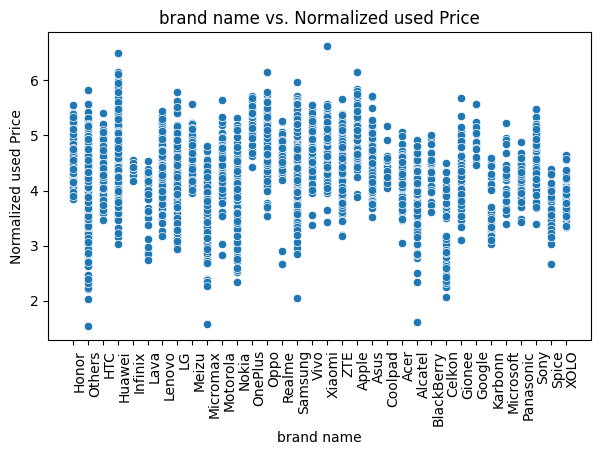

In [31]:
# Create a scatter plot of days used vs. normalized used price
plt.figure(figsize=(7, 4))
sns.scatterplot(x='brand_name', y='normalized_used_price',data=df)
plt.title('brand name vs. Normalized used Price')
plt.xticks(rotation = 90, ha = 'left')
plt.xlabel('brand name')
plt.ylabel('Normalized used Price')
plt.show()

The scatter plot above shows that there is no trend between the brand name and the price of the phone. This means that there is no visual relationship between them

---
### Feature engineering

In [32]:
#creating a new feature for the number of years a phone has existed before 2021
df['years_existed_after_release'] = 2021 - df.release_year
print(df.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  \
0        127               4.307572              4.715100   
1        325               5.162097              5.519018   
2    

Here a new column has been created from subtracting the release year from the year 2021. This is to show how old the phone is.

In [33]:
#dropping the release year and days used columns column
df = df.drop(['release_year', "days_used", 'brand_name'], axis = 1)
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,normalized_used_price,normalized_new_price,years_existed_after_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,5.111084,5.884631,1
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,4.389995,4.947837,1


 Here, the column release year has been dropped because a new feature has been created using the column so it is currently not needed.
 The days used and brand name columns have also been dropped because they have no relation ship with he target variable thus not needed

In [34]:
#initializing the simple imputer
imputer = SimpleImputer(strategy = 'median')

#looping through the data and inputing missing values
for col in df.select_dtypes(include = 'number').columns:
  df[[col]] = imputer.fit_transform(df[[col]])

#checking for missing values
df.isnull().sum()

os                             0
screen_size                    0
4g                             0
5g                             0
main_camera_mp                 0
selfie_camera_mp               0
int_memory                     0
ram                            0
battery                        0
weight                         0
normalized_used_price          0
normalized_new_price           0
years_existed_after_release    0
dtype: int64

All the columns with missing values have been filled.
The simple Imputer has been used to fill the missing values with the median

In [35]:
#getting the numeric columns in the dataset
numeric_df = df.select_dtypes(include = 'number').columns

#getting the zscore of the colums
z_scores = df[numeric_df].apply(zscore)
#getting the absolute values of the zscores
abs_zscore = z_scores.abs()

#setting the threshold
threshold = 3

#removing the outliers
non_outliers = (abs_zscore < threshold).all(axis = 1)

# Concatenate the non-outlier rows with the original DataFrame
df_clean = pd.concat([df[non_outliers], df[~non_outliers]])

# Display the cleaned DataFrame
print(df_clean.head())


        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   
5  Android        16.23  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  normalized_used_price  \
0        64.0  3.0   3020.0   146.0               4.307572   
1       128.0  8.0   4300.0   213.0               5.162097   
2       128.0  8.0   4200.0   213.0               5.111084   
4        64.0  3.0   5000.0   185.0               4.389995   
5        64.0  4.0   4000.0   176.0               4.413889   

   normalized_new_price  years_existed_after_release  
0              4.715100                          1.0  
1              5.519018                          1.0  
2              5.884631            

The outliers in the numerical columns of the dataset have been removed using the z_score method. This is to make the data more balanced.

In [36]:
#initializing the label encoder
le = LabelEncoder()
#label encoding the 4g and 5g columns
df['4g'] = le.fit_transform(df['4g'])

df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,normalized_used_price,normalized_new_price,years_existed_after_release
0,Android,14.50,1,no,13.0,5.0,64.0,3.0,3020.0,146.0,4.307572,4.715100,1.0
1,Android,17.30,1,yes,13.0,16.0,128.0,8.0,4300.0,213.0,5.162097,5.519018,1.0
2,Android,16.69,1,yes,13.0,8.0,128.0,8.0,4200.0,213.0,5.111084,5.884631,1.0
3,Android,25.50,1,yes,13.0,8.0,64.0,6.0,7250.0,480.0,5.135387,5.630961,1.0
4,Android,15.32,1,no,13.0,8.0,64.0,3.0,5000.0,185.0,4.389995,4.947837,1.0


Here, the label encoder has been used to change the 4g categorical column into a numeric column.

In [37]:
#label encoding the 4g and 5g columns
df['5g'] = le.fit_transform(df['5g'])

df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,normalized_used_price,normalized_new_price,years_existed_after_release
0,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,4.307572,4.715100,1.0
1,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,5.162097,5.519018,1.0
2,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,5.111084,5.884631,1.0
3,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,5.135387,5.630961,1.0
4,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,4.389995,4.947837,1.0


Here, the label encoder has been used to change the 5g categorical column into a numeric column.

In [38]:
#getting dummy variables
df = pd.get_dummies(df, columns = ['os'], drop_first = True)
df.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,normalized_used_price,normalized_new_price,years_existed_after_release,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,4.307572,4.715100,1.0,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,5.162097,5.519018,1.0,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,5.111084,5.884631,1.0,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,5.135387,5.630961,1.0,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,4.389995,4.947837,1.0,0,0,0


Here, dummy variables for the os and brand_name columns have been created

In [39]:
# creating the dependent and independent variables
X = df.drop(['normalized_used_price'], axis = 1)
y = df.pop('normalized_used_price')

X.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,normalized_new_price,years_existed_after_release,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,4.715100,1.0,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,5.519018,1.0,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,5.884631,1.0,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,5.630961,1.0,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,4.947837,1.0,0,0,0


The dependent variable in the dataset is the normalized used price column. This column has been separated from the independent variables

In [40]:
#Splitting data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

#checking the shape of training and test set
print('*' * 50)
print("Training Set Shape", X_train.shape)
print('*' * 50)
print("Testing set shape: ", X_test.shape)

**************************************************
Training Set Shape (2590, 14)
**************************************************
Testing set shape:  (864, 14)


- The data has been split into training and testing sets.
The training set has 2590 rows while the testing set has 864 rows.

In [41]:
#scaling the dataset
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train_scaled.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,normalized_new_price,years_existed_after_release,os_Others,os_Windows,os_iOS
0,0.765737,0.701381,4.725816,0.246583,1.356361,2.459073,2.861032,0.808830,0.469650,2.949805,-1.756305,-0.207589,-0.135949,-0.110064
1,-0.240018,0.701381,-0.211604,0.776957,0.214097,-0.259304,-0.023828,0.656481,-0.380068,-0.231261,-0.885716,-0.207589,-0.135949,-0.110064
2,0.436534,0.701381,4.725816,-0.920240,0.499663,0.905715,2.861032,1.418225,0.380206,2.253113,-1.756305,-0.207589,-0.135949,-0.110064
3,0.376914,0.701381,-0.211604,0.776957,0.214097,-0.259304,-0.023828,-0.105262,-0.324165,-0.324379,-0.885716,-0.207589,-0.135949,-0.110064
4,0.431349,0.701381,-0.211604,0.564807,3.640889,0.905715,1.418602,1.037353,0.033610,1.035125,-1.321011,-0.207589,-0.135949,-0.110064


The dataset has been scaled to ensure uniformity. No column can carry more weight than other columns due to larger values.Scaling ensures that all numerical features are on a comparable scale.


---
### Model Building

**Linear Regression**

In [42]:
#initializing the linear regressor
lin = LinearRegression()

#creating a copy of data
X_train_ln = X_train_scaled.copy()
X_test_ln = X_test_scaled.copy()
y_train_ln = y_train.copy()
y_test_ln = y_test.copy()


In [43]:
# fitting the data on the model
lin.fit(X_train_ln, y_train_ln)

#making predictions on the data
lin_pred = lin.predict(X_test_ln)

#checking the rmse
mse = mean_squared_error(y_test_ln, lin_pred)
ln_report = np.sqrt(mse)
print('The rmse is: ', ln_report)

The rmse is:  0.22616599596100845


Here, the linear was fit on the training data. The fitted model is then used to make predictions on the test dataset.

This is then used to calculate the root mean squared error. The root mean squared error is 0.2262

---

**Lasso Regression**

In [44]:
#initializing the lasso regression
lass = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)

#Creating a copy of data to use on the lasso regression model
X_train_la = X_train_scaled.copy()
X_test_la = X_test_scaled.copy()
y_train_la = y_train.copy()
y_test_la = y_test.copy()

In [46]:
#fitting the model
lasso_reg = lass.fit(X_train_la, y_train_la)
#predicting values for testing set
predicted_vals2 = lasso_reg.predict(X_test_la)

#getting the mse
lasso_mse = mean_squared_error(y_test_la, predicted_vals2)
lasso_rmse = np.sqrt(lasso_mse)
print("The rmse of lasso regression is: ",lasso_rmse)

#getting the best alphas and coefficients
best_alpha = lasso_reg.alpha_
print("The best alpha value is: ",best_alpha)


The rmse of lasso regression is:  0.2261520724301786
The best alpha value is:  0.001


Here, the lasso regression was used to fit the training data and make predictions on the test data. The rmse results are almost similar to the rmse values of the linear regressor

The best alpha value is 0.001

---
**Ridge regression**

In [47]:
#using ridge regression
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
#Creating a copy of data to use on the ridge regression model
X_train_ri = X_train_scaled.copy()
X_test_ri = X_test_scaled.copy()
y_train_ri = y_train.copy()
y_test_ri = y_test.copy()


In [48]:
#fitting the data
ridge_regression = ridge_cv.fit(X_train_ri, y_train_ri)
#predicting values for test set
predicted_vals3 = ridge_regression.predict(X_test_ri)

#getting the mse
ridge_mse = mean_squared_error(y_test_ri, predicted_vals3)
ridge_rmse = np.sqrt(ridge_mse)
print('The rmse of ridge regression is: ',ridge_rmse)

#getting the best alphas and coefficients
best_alpha_ridge = ridge_regression.alpha_
print("The best alpha value is: ",best_alpha_ridge)


The rmse of ridge regression is:  0.226229885377321
The best alpha value is:  10.0


Here, the ridge regression was used to fit the training data and make predictions on the test data. The rmse results are almost similar to the rmse values of the linear regressor and lasso regression

The best alpha value is 10.0

---
**Random Forest regression**

In [49]:
#using random forest regressor
parameters = {
    'n_estimators': randint(100,1000), #number of trees,
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split.
    'max_depth': randint(0,100),# maximum number of levels for each decision tree
    'min_samples_split': randint(2, 11),  # Minimum number of data points placed in a node before the node is split.
    'min_samples_leaf': randint(1, 11),  # Minimum number of data points allowed in a leaf node.
    'bootstrap': [True, False]  # Method of selecting samples for training each tree.
}

#creating an insatnce of the random forest regressor
rf = RandomForestRegressor()

In [50]:
#Instatiating randmo search cv
random_search = RandomizedSearchCV(estimator = rf, param_distributions= parameters,
                                    n_iter=100,cv = 5, n_jobs=-1,verbose= True)

In [51]:
#making a copy of the data
X_train_rf = X_train_scaled.copy()
X_test_rf = X_test_scaled.copy()
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()


In [52]:
#fitting the model to the data
random_search.fit(X_train_rf, y_train_rf)

#getting the best parameters
best_params = random_search.best_params_
print("Best Parameters: ", best_params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters:  {'bootstrap': False, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 646}


In [53]:
#getting the best model
best_model = random_search.best_estimator_

#predicting on the test set
predicted_rf = best_model.predict(X_test_rf)
#scoring the model
mse = mean_squared_error(y_test_rf, predicted_rf)
rf_result = np.sqrt(mse)
print('accuracy of the model is: ', rf_result)

accuracy of the model is:  0.2203589626195378


Here, the random forest regression was used to fit the training data and make predictions on the test data. The rmse results are almost similar to the rmse values of the linear regressor, lasso  and ridge regression. So far the random forest is the best performing model

-